Shayan Golshan

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from termcolor import colored
from sklearn.preprocessing import OneHotEncoder 
from matplotlib.pyplot import imshow

## Convolutional Neural Network for Brain Tumor Classification

In [ ]:
# This cell updates result list for images with tumor
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

data = []
paths = []
result = []

for root_dir, sub_dir, files in os.walk(r'C:\My Personal Docs\Career Analytics Work\Github Projects\8) Machine Learning - Brain Image Tumor Detector\brain_tumor_dataset\yes'):
    for file in files:
        if '.jpg' in file:
            paths.append(os.path.join(root_dir, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

# This cell updates result list for images without tumor

paths = []
for root_dir, sub_dir, files in os.walk(r"C:\My Personal Docs\Career Analytics Work\Github Projects\8) Machine Learning - Brain Image Tumor Detector\brain_tumor_dataset\no"):
    for file in files:
        if '.jpg' in file:
            paths.append(os.path.join(root_dir, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [3]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [4]:
result = np.array(result)
result = result.reshape(139,2)

In [5]:
# Split dataset into training and testing sets, MUST have shuffle = True because the data is ordered by Yes's and then No's.
X_train, X_test, y_train, y_test = train_test_split(data, result, test_size=0.2, random_state=0, shuffle = True)

# Build the Model

In [6]:
# citation from https://www.kaggle.com/code/akshitmadan/tumor-classification-using-keras-for-beginners since the NN model I was trying with the Keras documentation was not working as well

model = Sequential()

# Here, it is important that my input shape matches the pixel size of my original images and that it is in RGB format (denoted by the 3)
model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", 
              optimizer='Adamax',
              metrics=['accuracy']
              )
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [7]:
# Checking the shape of the data to see if it was processed correctly
X_train.shape

(111, 128, 128, 3)

In [8]:
y_train.shape

(111, 2)

# Train the Model

In [9]:
history = model.fit(
    X_train, y_train, batch_size=35,
    validation_data=(X_test, y_test),
    epochs=40,
    verbose=1
)

Epoch 1/40
4/4 [==============================] - 2s 308ms/step - loss: 30.3054 - accuracy: 0.6667 - val_loss: 67.0993 - val_accuracy: 0.5000
Epoch 2/40
4/4 [==============================] - 1s 257ms/step - loss: 24.1807 - accuracy: 0.6126 - val_loss: 56.9284 - val_accuracy: 0.5000
Epoch 3/40
4/4 [==============================] - 1s 254ms/step - loss: 9.8715 - accuracy: 0.7387 - val_loss: 25.7949 - val_accuracy: 0.5000
Epoch 4/40
4/4 [==============================] - 1s 254ms/step - loss: 2.0566 - accuracy: 0.8739 - val_loss: 12.5141 - val_accuracy: 0.6071
Epoch 5/40
4/4 [==============================] - 1s 254ms/step - loss: 4.5380 - accuracy: 0.8198 - val_loss: 18.8912 - val_accuracy: 0.5714
Epoch 6/40
4/4 [==============================] - 1s 254ms/step - loss: 3.3019 - accuracy: 0.8468 - val_loss: 9.5648 - val_accuracy: 0.6786
Epoch 7/40
4/4 [==============================] - 1s 258ms/step - loss: 0.9094 - accuracy: 0.9279 - val_loss: 3.1972 - val_accuracy: 0.7143
Epoch 8/40
4/

In [10]:
print(colored("\nEvaluating on test data", 'blue'))
results = model.evaluate(X_test, y_test, verbose=1)
print(colored("Test loss: {:.4f}".format(results[0]), 'red'))
print(colored("Test accuracy: {:.2f}%".format(results[1] * 100), 'green'))


Evaluating on test data
1/1 [==============================] - 0s 48ms/step - loss: 2.5469 - accuracy: 0.8214
Test loss: 2.5469
Test accuracy: 82.14%


# Plotting the Loss

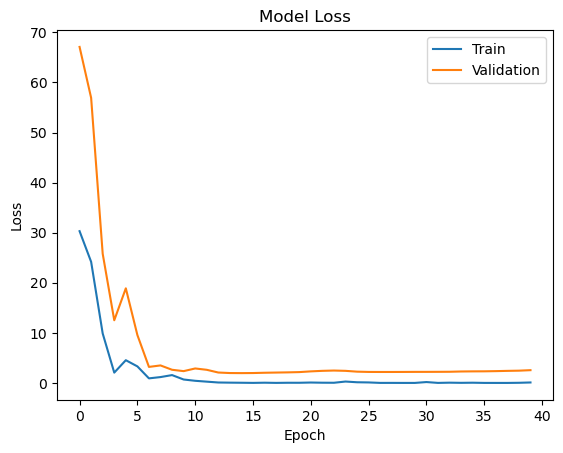

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [12]:
def names(number):
    if number==0:
        return 'a Brain tumor'
    else:
        return 'not a Brain tumor'

100.0% confidence that this is not a Brain tumor


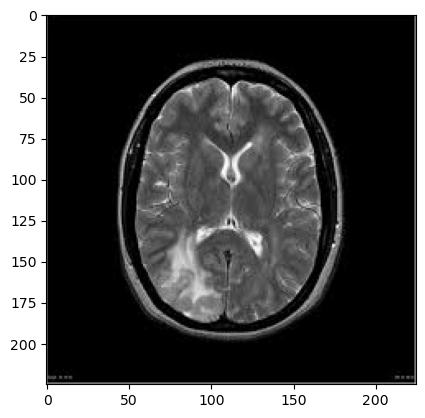

In [ ]:
img = Image.open(r"C:\My Personal Docs\Career Analytics Work\Github Projects\8) Machine Learning - Brain Image Tumor Detector\brain_tumor_dataset\no\32 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% confidence that this is ' + names(classification))

99.99815225601196% confidence that this is a Brain tumor


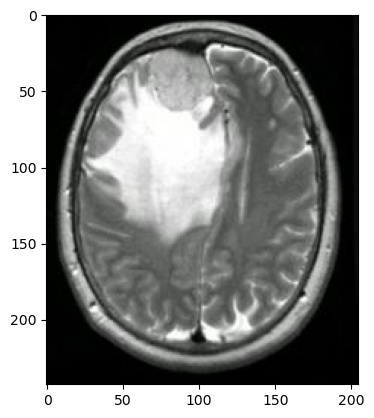

In [14]:
img = Image.open(r"C:\My Personal Docs\Career Analytics Work\Github Projects\8) Machine Learning - Brain Image Tumor Detector\brain_tumor_dataset\yes\Y65.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% confidence that this is ' + names(classification))